# The Sparks Foundation Internship - TASK 1
# "Prediction Using Supervised Machine Learning"

##### Author: Hamza Ahmed Ansari
##### Batch: September 2022
###### Problem:
   * Predict the percentage of an student based on the the number of study hours. 
   
###### Solution:
   * I'm using Simple Linear Regression Model to solve this problem


In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
s_data = pd.read_csv("student_score.csv")
s_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

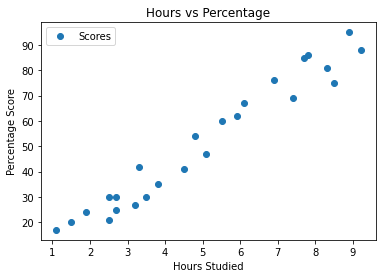

In [3]:
# Plotting the distribution of scores
s_data.plot(x="Hours", y="Scores", style="o")
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

##### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [4]:
x = s_data.iloc[:, :-1].values
y = s_data.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
model = reg.fit(x_train, y_train)

print("Training Complete...")

Training Complete...


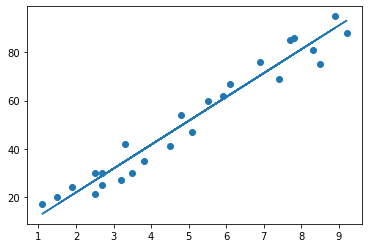

In [7]:
# Plotting the regression line
line = reg.coef_*x+reg.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

### Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [8]:
print(x_test) # Testing data - In Hours
y_pred = reg.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


What will be predicted score if a student studies for 9.25 hrs/day?

In [10]:
hours = np.array(9.25).reshape(-1,1)
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


### Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. So how good was our model?

In [13]:
model.score(x_test, y_test)*100

94.54906892105356

### Comment:

Looks like our model exhibits 94.54% of accuracy.

# TASK 1 Completed!